# Neurons selected by gradient magnitude with fine-tuned directions

In [1]:
import torch
from sandbox import SimpleModel, toy_data, experiment_series, eval_series
from pathlib import Path

In [2]:
model_params = (1, 1, 8, 2, 2)
num_kept_neurons = 2
lr=0.005
runs=50

#0: loss: 0.033358827233314514 - size: 209
#1: loss: 0.041410479694604874 - size: 209
#2: loss: 0.043674286454916 - size: 209
#3: loss: 0.03237251192331314 - size: 209
#4: loss: 0.054093196988105774 - size: 209
#5: loss: 0.029633188620209694 - size: 209
#6: loss: 0.07227687537670135 - size: 209
#7: loss: 0.062259893864393234 - size: 209
#8: loss: 0.04886519908905029 - size: 209
#9: loss: 0.028317850083112717 - size: 209
#10: loss: 0.05590386316180229 - size: 209
#11: loss: 0.03102976828813553 - size: 209
#12: loss: 0.031223755329847336 - size: 209
#13: loss: 0.03859482705593109 - size: 209
#14: loss: 0.04053051024675369 - size: 209
#15: loss: 0.04647061228752136 - size: 209
#16: loss: 0.030888264998793602 - size: 209
#17: loss: 0.14650078117847443 - size: 209
#18: loss: 0.06786194443702698 - size: 209
#19: loss: 0.03201916813850403 - size: 209
#20: loss: 0.05789096653461456 - size: 209
#21: loss: 0.049554433673620224 - size: 209
#22: loss: 0.032550372183322906 - size: 209
#23: loss: 0.

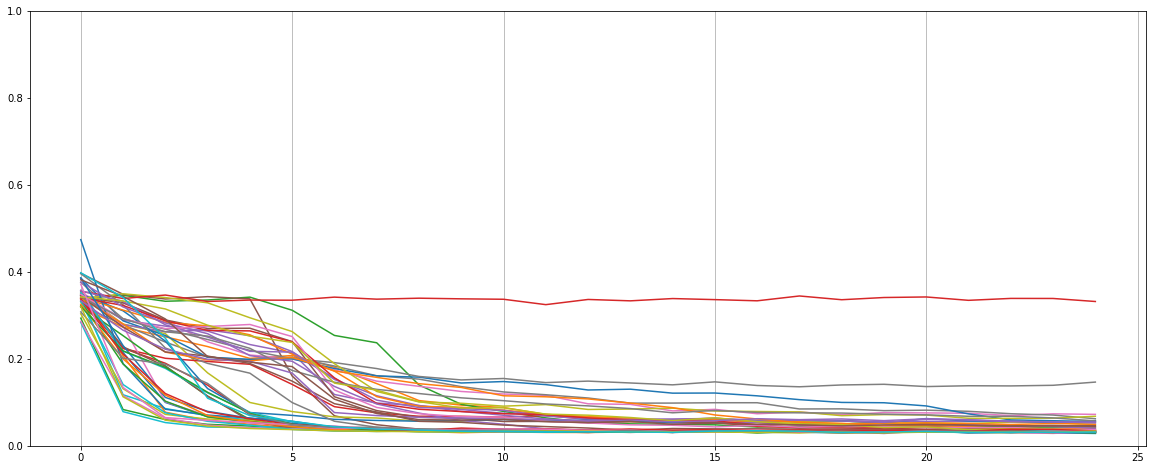

In [3]:
criterion = torch.nn.MSELoss()

def grow(model):
    model.grow(num_novel=4)
    
    model.tune_direction()
    model.tune_new_neurons()
    
    
    with model.new_grad_only():
        model.zero_grad()
        
        for _ in range(200): # batches
            train_x, train_y = toy_data()
            y = model(train_x)
            loss = criterion(y, train_y)

            loss.backward()

        selected = model.select(num_kept_neurons)

    model.degrow(*selected)

series = experiment_series(model_params, runs=runs, grow=grow, lr=lr)

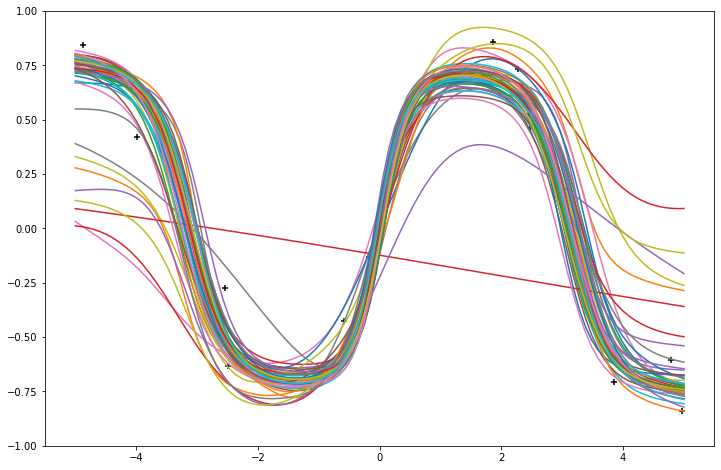

In [4]:
eval_series(series)

In [5]:
d = Path("results")
d.mkdir(parents=True, exist_ok=True)

torch.save(series, d / 'firefly_tuned.pt')